In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data set
df = pd.read_csv("dataset.csv") 
df.shape 

(303, 14)

### EDA

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**No missing values are present in data**

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


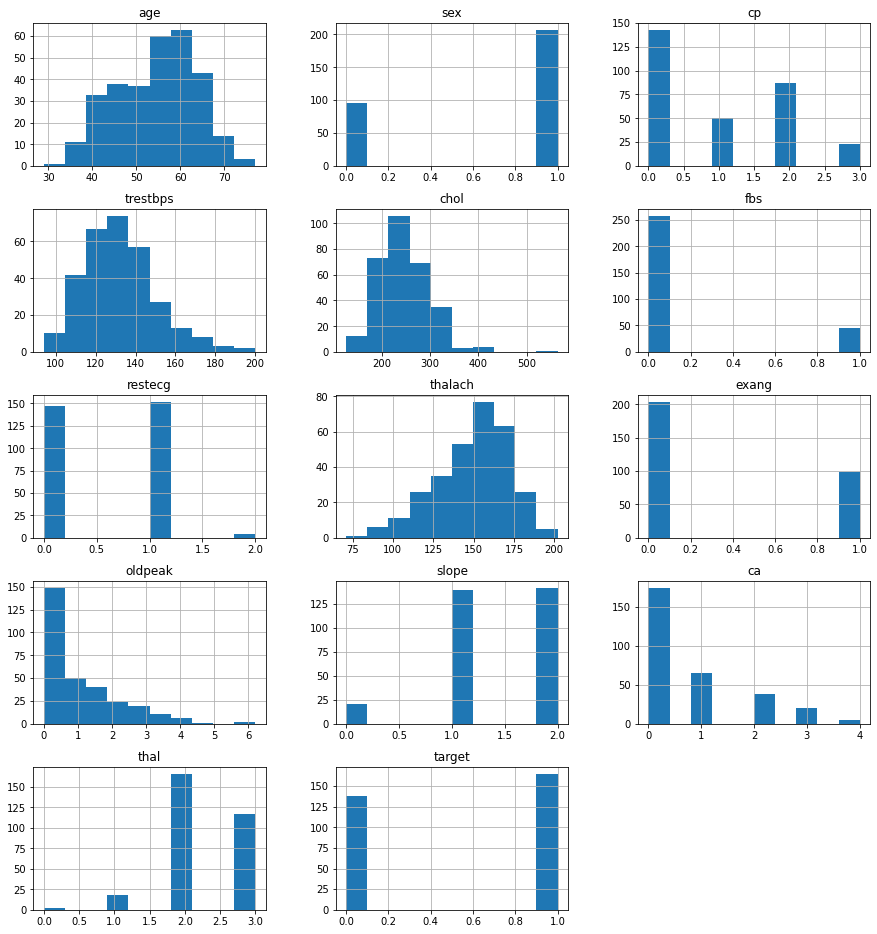

In [7]:
# univariate analysis
df.hist(figsize=(15,30),layout=(9,3))
plt.show()

**From the above histogram plot we can see that some features are catogorical others are continuous **

  continuous features are age,trestbps,chol,thalach,oldpeak others catogorical

In [8]:
# value count for target variables
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

so it is balanced dataset.

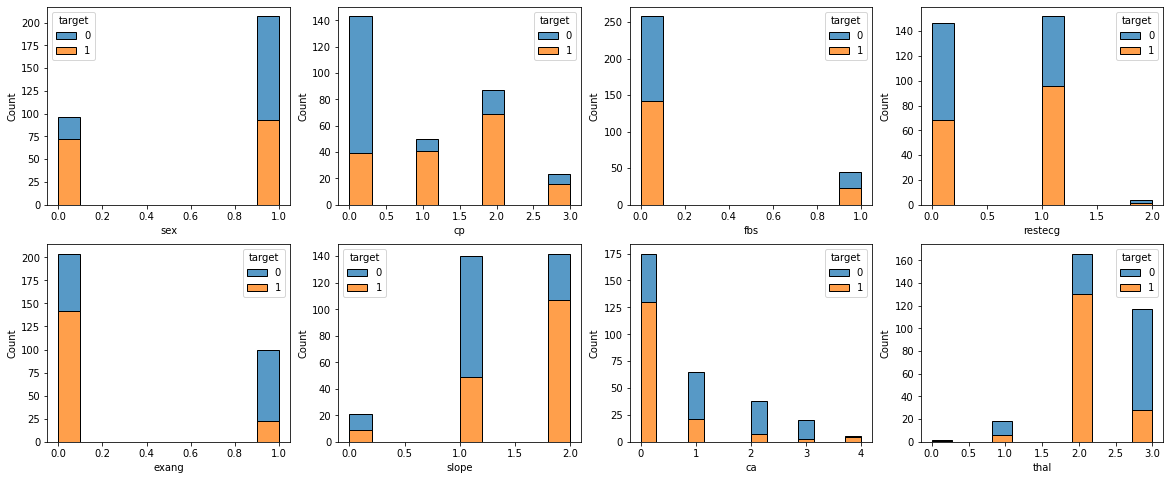

In [9]:
# bivariate analysis for categorical variables 
fig, axs = plt.subplots(2, 4, figsize=(20,8))
sns.histplot(data=df, x="sex", hue="target", multiple="stack",ax=axs[0, 0])
sns.histplot(data=df, x="cp", hue="target", multiple="stack",ax=axs[0, 1])
sns.histplot(data=df, x="fbs", hue="target", multiple="stack",ax=axs[0, 2])
sns.histplot(data=df, x="restecg", hue="target", multiple="stack",ax=axs[0, 3])
sns.histplot(data=df, x="exang", hue="target", multiple="stack",ax=axs[1, 0])
sns.histplot(data=df, x="slope", hue="target", multiple="stack",ax=axs[1, 1])
sns.histplot(data=df, x="ca", hue="target", multiple="stack",ax=axs[1, 2])
sns.histplot(data=df, x="thal", hue="target", multiple="stack",ax=axs[1, 3])
plt.show()

**from the bivariate analysis of categorical variable it is found that female(sex=0),cp>0(having chest pain),exang=0(exercise induced angina),slope=2,ca=0,4 and thal=2 are favourable to heart disease**

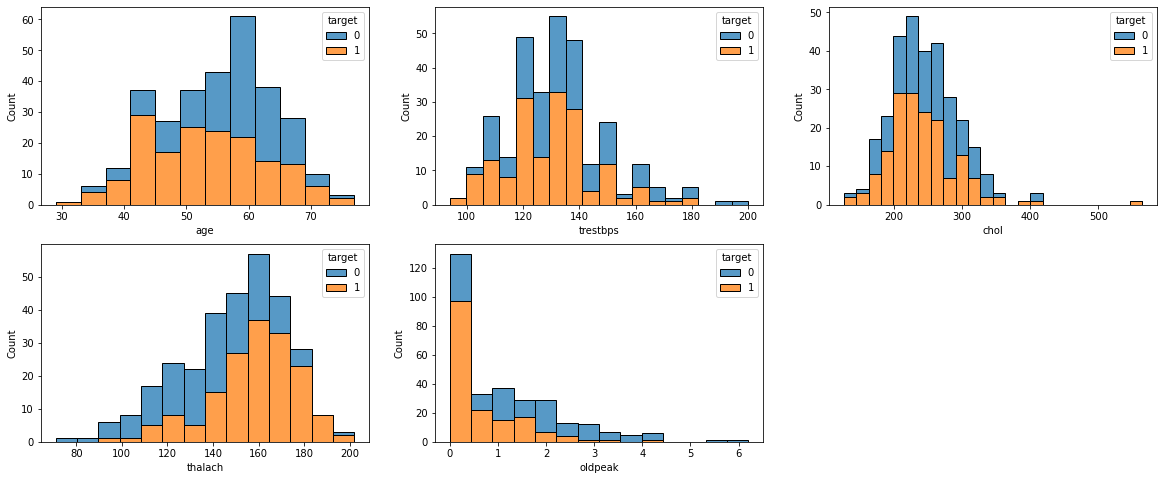

In [10]:
# bivariate analysis for continuous variables 
fig, axs = plt.subplots(2, 3, figsize=(20,8))
fig.delaxes(axs[1,2])
sns.histplot(data=df, x="age", hue="target", multiple="stack",ax=axs[0, 0])
sns.histplot(data=df, x="trestbps", hue="target", multiple="stack",ax=axs[0, 1])
sns.histplot(data=df, x="chol", hue="target", multiple="stack",ax=axs[0, 2])
sns.histplot(data=df, x="thalach", hue="target", multiple="stack",ax=axs[1, 0])
sns.histplot(data=df, x="oldpeak", hue="target", multiple="stack",ax=axs[1, 1])
plt.show()

<AxesSubplot:>

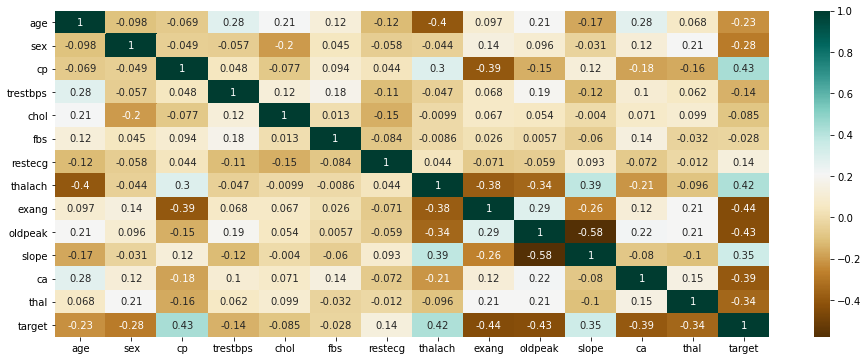

In [11]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(),cmap='BrBG', annot=True)

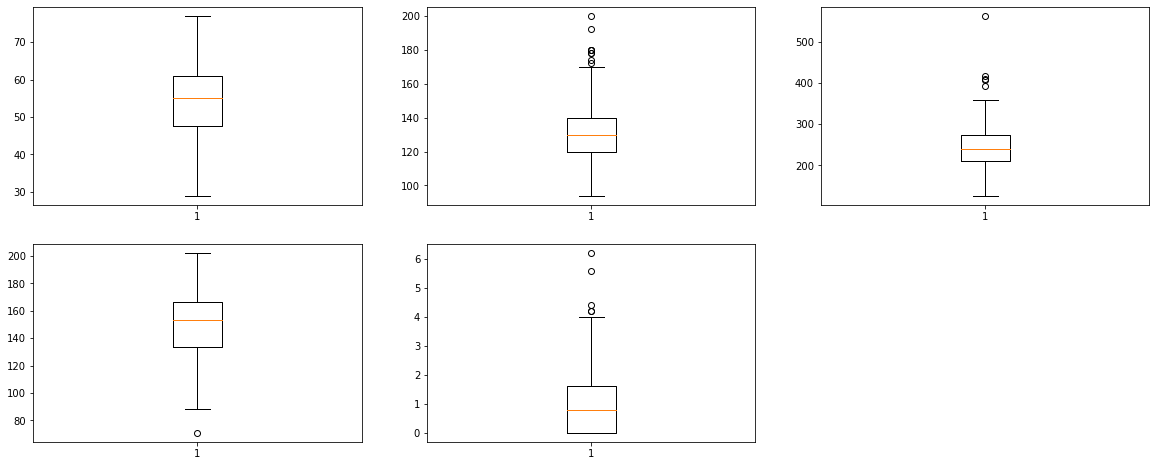

In [12]:
cols=['age','trestbps','chol','oldpeak','thalach']
fig, axs = plt.subplots(2, 3, figsize=(20,8))
fig.delaxes(axs[1,2])
axs[0,0].boxplot(data=df, x="age")
axs[0,1].boxplot(data=df, x="trestbps")
axs[0,2].boxplot(data=df, x="chol")
axs[1,0].boxplot(data=df, x="thalach")
axs[1,1].boxplot(data=df, x="oldpeak")
plt.show()

In [13]:
df = pd.get_dummies(df,drop_first= True)

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
#split X and y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [16]:
X.shape

(303, 13)

In [17]:
y.shape

(303,)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [19]:

#splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [20]:

#importing the model and metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [21]:
mse = []
r2 = []
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse_i = mean_squared_error(y_test,y_pred)
    mse.append(mse_i)
    r2_i = r2_score(y_test,y_pred)
    r2.append(r2_i)
#     print('i = {}, mse = {} , r2 = {}'.format(i,mse_i,r2_i))

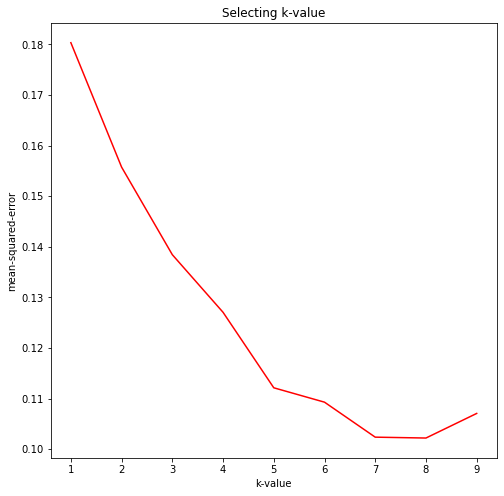

In [22]:
plt.figure(figsize = (8,8))
plt.plot(np.arange(1,10),mse,'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title('Selecting k-value')
plt.show()

From the Graph we can take K Values as 7

In [23]:

model = KNeighborsRegressor(n_neighbors=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [24]:
r2_score(y_test,y_pred)

0.3687363834422659